1. Pre Requisitos

In [1]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

2. Carga de la Data

In [3]:
# Ubicacion del archivo de datos
url = '/content/indiceDesempeñoAmbiental.csv' # external url?

In [6]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url , delimiter=';') # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,Puesto Mundial,Puesto Continental,País,Región,Puntuación 2018
0,0,1,1,Suiza Suiza,Europa,87.42
1,1,2,2,Francia,Europa,83.95
2,2,3,3,Dinamarca Dinamarca,Europa,81.60
3,3,4,4,Malta Malta,Europa,80.90
4,4,5,5,Suecia Suecia,Europa,80.51


3. Inspeccion de la data

In [7]:
# Visualizamos el DataFrame
data

,Unnamed: 0,Puesto Mundial,Puesto Continental,País,Región,Puntuación 2018
0,0,1,1,Suiza Suiza,Europa,87.42
1,1,2,2,Francia,Europa,83.95
2,2,3,3,Dinamarca Dinamarca,Europa,81.60
3,3,4,4,Malta Malta,Europa,80.90
4,4,5,5,Suecia Suecia,Europa,80.51
5,5,6,6,Reino Unido Reino Unido,Europa,79.89
6,6,7,7,Luxemburgo Luxemburgo,Europa,79.12
7,7,8,8,Austria Austria,Europa,78.97
8,8,9,9,Irlanda,Europa,78.77
9,9,10,10,Finlandia Finlandia,Europa,78.64


In [8]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,Puesto Mundial,Puesto Continental,País,Región,Puntuación 2018
0,1,1,Suiza Suiza,Europa,87.42
1,2,2,Francia,Europa,83.95
2,3,3,Dinamarca Dinamarca,Europa,81.60
3,4,4,Malta Malta,Europa,80.90
4,5,5,Suecia Suecia,Europa,80.51
5,6,6,Reino Unido Reino Unido,Europa,79.89
6,7,7,Luxemburgo Luxemburgo,Europa,79.12
7,8,8,Austria Austria,Europa,78.97
8,9,9,Irlanda,Europa,78.77
9,10,10,Finlandia Finlandia,Europa,78.64


In [9]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Puesto Mundial      50 non-null     int64  
 1   Puesto Continental  50 non-null     int64  
 2   País                50 non-null     object 
 3   Región              50 non-null     object 
 4   Puntuación 2018     50 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [10]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,Puesto Mundial,Puesto Continental,Puntuación 2018
count,50.00000,50.000000,50.000000
mean,25.50000,12.440000,72.206800
std,14.57738,10.194356,6.331786
min,1.00000,1.000000,64.110000
25%,13.25000,4.000000,66.105000
50%,25.50000,8.500000,72.045000
75%,37.75000,20.750000,78.150000
max,50.00000,33.000000,87.420000


4. Depuración de la data

In [11]:
# Fix no value in Titulos col
def fixTitulos(val):
    return 0 if val == '-' else int(val)

In [12]:
def fixRend(val):
    if (val == '%'):
        return float(val.replace(',', '.').replace('%', ''))
    return val

In [13]:
# Correccion de lo campos mal formateados (Titulos y Rendimiento)
# data.apply(lambda x : fixTitulos(x['Títulos']), axis=1)
data['Puesto Mundial'] = data.apply(lambda x: fixTitulos(x['Puesto Mundial']), axis=1) # Aplicamos la funcion fixTitulos() a la columna [Titulos]
# data.apply(lambda x : fixRend(x['Rend.']), axis=1)
data['Puntuación 2018'] = data['Puntuación 2018'].apply(lambda x: fixRend(x)) # Aplicamos la funcion fixRend() a la columna [Rend]
data

,Puesto Mundial,Puesto Continental,País,Región,Puntuación 2018
0,1,1,Suiza Suiza,Europa,87.42
1,2,2,Francia,Europa,83.95
2,3,3,Dinamarca Dinamarca,Europa,81.60
3,4,4,Malta Malta,Europa,80.90
4,5,5,Suecia Suecia,Europa,80.51
5,6,6,Reino Unido Reino Unido,Europa,79.89
6,7,7,Luxemburgo Luxemburgo,Europa,79.12
7,8,8,Austria Austria,Europa,78.97
8,9,9,Irlanda,Europa,78.77
9,10,10,Finlandia Finlandia,Europa,78.64


In [14]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Puesto Mundial      50 non-null     int64  
 1   Puesto Continental  50 non-null     int64  
 2   País                50 non-null     object 
 3   Región              50 non-null     object 
 4   Puntuación 2018     50 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


4. Análisis de la Data

In [15]:
data[['Puntuación 2018', 'Puesto Mundial', 'Puesto Continental', 'Región']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


<ipython-input-15-50d34a8202e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['Puntuación 2018', 'Puesto Mundial', 'Puesto Continental', 'Región']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-15-50d34a8202e0>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['Puntuación 2018', 'Puesto Mundial', 'Puesto Continental', 'Región']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Puntuación 2018,Puesto Mundial,Puesto Continental
Puntuación 2018,1.00,-0.98,-0.47
Puesto Mundial,-0.98,1.00,0.48
Puesto Continental,-0.47,0.48,1.00


Interpretación de la matriz ?

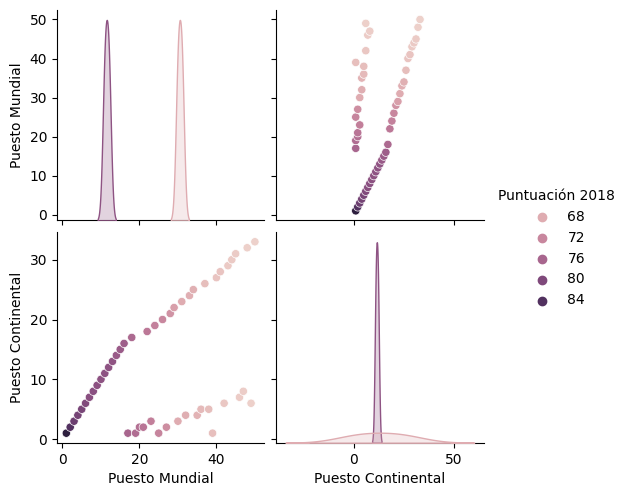

In [16]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Puntuación 2018")

Interpretación de los gráficos ?

In [19]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
sel_data = data[['Puntuación 2018', 'Puesto Mundial','Puesto Continental']]
sel_data

,Puntuación 2018,Puesto Mundial,Puesto Continental
0,87.42,1,1
1,83.95,2,2
2,81.60,3,3
3,80.90,4,4
4,80.51,5,5
5,79.89,6,6
6,79.12,7,7
7,78.97,8,8
8,78.77,9,9
9,78.64,10,10


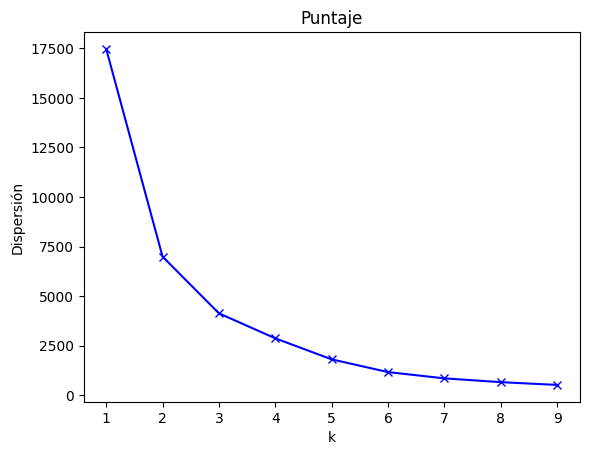

In [20]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Puntaje')